# ORIE 5780 Project Code
### Advanced Machine Learning Applications in Morningstar Fund Rating Predictions
### Team: p<0.05 
### Team members: Xiaoxuan Liu, Yuxuan Wang, Quanyi Li

# 1.1. Data Importation

In [2]:
# pip install pandas openpyxl

In [3]:
import pandas as pd

# file_path = '/Users/liuxiaoxuan/Desktop/Cornell/24SpringCourses/5741/Project/Dataset Morningstar per Python.xlsx' # Xiaoxuan Path
file_path = "D:\\Cornell\\Spring 2024\\ORIE 5741\\Dataset Morningstar per Python.xlsx" # Yuxuan Path

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data to get a basic understanding of the data
print(data.head())

# Print all column names to aid in feature selection
# print([col.strip() for col in data.columns])

  Ticker                                     Name          Industry    \
0      IWF          iShares Russell 1000 Growth ETF  Asset Management   
1      IAU                       iShares Gold Trust  Asset Management   
2     USSG    Xtrackers MSCI USA ESG Leaders Eq ETF  Asset Management   
3     FPEI  First Trust Instl Pref Secs and Inc ETF  Asset Management   
4      IYE                    iShares US Energy ETF  Asset Management   

      Investment Type   ESG portfolio PC top 10 holdings  \
0  Exchange-Traded Fund             -                  -   
1  Exchange-Traded Fund             -                  -   
2  Exchange-Traded Fund           Yes               0.38   
3  Exchange-Traded Fund             -                  -   
4  Exchange-Traded Fund             -                  -   

  Net flow - 1 year, USD BIL $ Medalist Rating - Overall   \
0                            -                     Silver   
1                            -                          -   
2                

In [ ]:
# Some financial metrics have 1-year, 3-year, and 5-year versions. Choosing "3-year" metrics because: 3-year metrics provide a mid-to-long-term performance perspective and can also avoid overfitting to short-term fluctuations.

# Selected feature list (based on 3-year data and other relevant indicators)
# Total Return - 3 Year (%)
# Morningstar Rating for Funds - 3 Year: The Morningstar rating for funds over three years.
# Standard Deviation - 3 Year, Monthly: Three-year monthly standard deviation, measures return volatility.
# Sharpe Ratio - 3 Year, Monthly: Three-year monthly Sharpe ratio, risk-adjusted return.
# Alpha - 3 Year, Monthly: Three-year monthly alpha value, measures the fund's performance relative to the benchmark.
# Beta - 3 Year, Monthly: Three-year monthly beta value, measures the fund's correlation with the market.
# r-Squared - 3 Year, Monthly: Three-year monthly coefficient of determination, measures synchronization of fund movements with the market.
# Downside Capture Ratio - 3 Year: Three-year downside capture ratio, reflects fund performance when the market declines.
# Upside Capture Ratio - 3 Year: Three-year upside capture ratio, reflects fund performance when the market rises.
# Information Ratio - 3 Year: Three-year information ratio, measures the excess return of the fund relative to the benchmark against the tracking error.
# Tracking Error - 3 Year, Monthly: Three-year tracking error, measures the deviation of fund performance from the benchmark.
# Turnover Ratio (%): Turnover ratio, reflects the activity level of fund management.
# Net Expense Ratio (%): Net expense ratio, reflects the cost of fund management.
# ESG portfolio: Indicates if it is an ESG investment portfolio, an important factor in current investment trends.
# Management Fee (%): Management fee ratio.
# Fund Size (USD BIL $): Fund size, larger funds may exhibit more stable performance.


# Clean column names, remove spaces and non-printable characters
cleaned_columns = [col.strip() for col in data.columns]
data.columns = cleaned_columns

# debug
# # Print all column names, manually search for columns containing keywords
# print(data.columns.tolist())

# # Search keywords to identify correct column names
# import re
# for col in data.columns:
#     if re.search('turnover', col, re.IGNORECASE):  # Ignore case sensitivity
#         print("Found Turnover Ratio:", col)
#     if re.search('expense', col, re.IGNORECASE):
#         print("Found Net Expense Ratio:", col)
#     if re.search('management fee', col, re.IGNORECASE):
#         print("Found Management Fee:", col)


columns_to_select = [
    'Ticker', 'Inception Date', 'Total Return - 3 Year (%)',
    'Morningstar Rating for Funds - 3 Year', 'Fund Size',
    'Standard Deviation - 3 Year, Monthly', 'Sharpe Ratio - 3 Year, Monthly',
    'Alpha - 3 Year, Monthly', 'Beta - 3 Year, Monthly',
    'r-Squared - 3 Year, Monthly', 'Downside Capture Ratio - 3 Year',
    'Upside Capture Ratio - 3 Year', 'Information Ratio - 3 Year',
    'Tracking Error - 3 Year, Monthly', 'Turnover Ratio\xa0 (%)',
    'Adjusted Expense Ratio\xa0 (%)', 'ESG portfolio', 'Management Fee\xa0 (%)',
]

# Retry creating a new DataFrame
new_data = data[columns_to_select]

# Rename column names
new_data = new_data.rename(columns={
    'Turnover Ratio\xa0 (%)': 'Turnover Ratio',
    'Adjusted Expense Ratio\xa0 (%)': 'Adjusted Expense Ratio',
    'Management Fee\xa0 (%)': 'Management Fee',
    'Inception Date': 'Inception Date',
    'Total Return - 3 Year (%)': 'Total Return 3 Year',
    'Morningstar Rating for Funds - 3 Year': 'Morningstar Rating 3 Year',
    'Standard Deviation - 3 Year, Monthly': 'Standard Deviation 3 Year Monthly',
    'Sharpe Ratio - 3 Year, Monthly': 'Sharpe Ratio 3 Year Monthly',
    'Alpha - 3 Year, Monthly': 'Alpha 3 Year Monthly',
    'Beta - 3 Year, Monthly': 'Beta 3 Year Monthly',
    'r-Squared - 3 Year, Monthly': 'R-Squared 3 Year Monthly',
    'Downside Capture Ratio - 3 Year': 'Downside Capture Ratio 3 Year',
    'Upside Capture Ratio - 3 Year': 'Upside Capture Ratio 3 Year',
    'Information Ratio - 3 Year': 'Information Ratio 3 Year',
    'Tracking Error - 3 Year, Monthly': 'Tracking Error 3 Year Monthly',
    'Fund Size': 'Fund Size',
    'ESG portfolio': 'ESG Portfolio'
})

# Display the first few rows of the renamed DataFrame to confirm changes
print(new_data.head())

# 1.2. Data Preprocessing and Descriptive Statistics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'Morningstar Rating 3 Year' is the target variable y, and it needs to be converted to a categorical type
new_data['Morningstar Rating 3 Year'] = new_data['Morningstar Rating 3 Year'].astype('category')

# Convert all numerical features to float
num_cols = ['Total Return 3 Year', 'Standard Deviation 3 Year Monthly',
            'Sharpe Ratio 3 Year Monthly', 'Alpha 3 Year Monthly', 'Beta 3 Year Monthly',
            'R-Squared 3 Year Monthly', 'Downside Capture Ratio 3 Year', 'Upside Capture Ratio 3 Year',
            'Information Ratio 3 Year', 'Tracking Error 3 Year Monthly', 'Turnover Ratio',
            'Adjusted Expense Ratio', 'Management Fee', 'Fund Size']

for col in num_cols:
    new_data[col] = pd.to_numeric(new_data[col], errors='coerce')

# Check for missing values
print(new_data.isnull().sum())


Ticker                                  0
Inception Date                          0
Total Return 3 Year                  2355
Morningstar Rating 3 Year               0
Fund Size                              18
Standard Deviation 3 Year Monthly    1986
Sharpe Ratio 3 Year Monthly          1998
Alpha 3 Year Monthly                 2012
Beta 3 Year Monthly                  2013
R-Squared 3 Year Monthly             2013
Downside Capture Ratio 3 Year        2009
Upside Capture Ratio 3 Year          1996
Information Ratio 3 Year             2002
Tracking Error 3 Year Monthly        1996
Turnover Ratio                       1265
Adjusted Expense Ratio                195
ESG Portfolio                           0
Management Fee                        547
dtype: int64


# 2.1. Data Cleaning

In [7]:
# Remove rows with missing values
original_row_count = new_data.shape[0]
new_data_clean = new_data.dropna()

# Calculate and display the number of rows after removing missing values
cleaned_row_count = new_data_clean.shape[0]
print(f"Original data rows: {original_row_count}")
print(f"Rows after removing missing values: {cleaned_row_count}")
print(f"Number of rows lost: {original_row_count - cleaned_row_count}")
print(f"Percentage of data retained: {100 * cleaned_row_count / original_row_count:.2f}%")


Original data rows: 13929
Rows after removing missing values: 10606
Number of rows lost: 3323
Percentage of data retained: 76.14%


In [ ]:
# Overall descriptive statistics
print("Descriptive statistics results:")
print(new_data.describe())

# Check for missing values
print("\nMissing values check:")
print(new_data.isnull().sum())

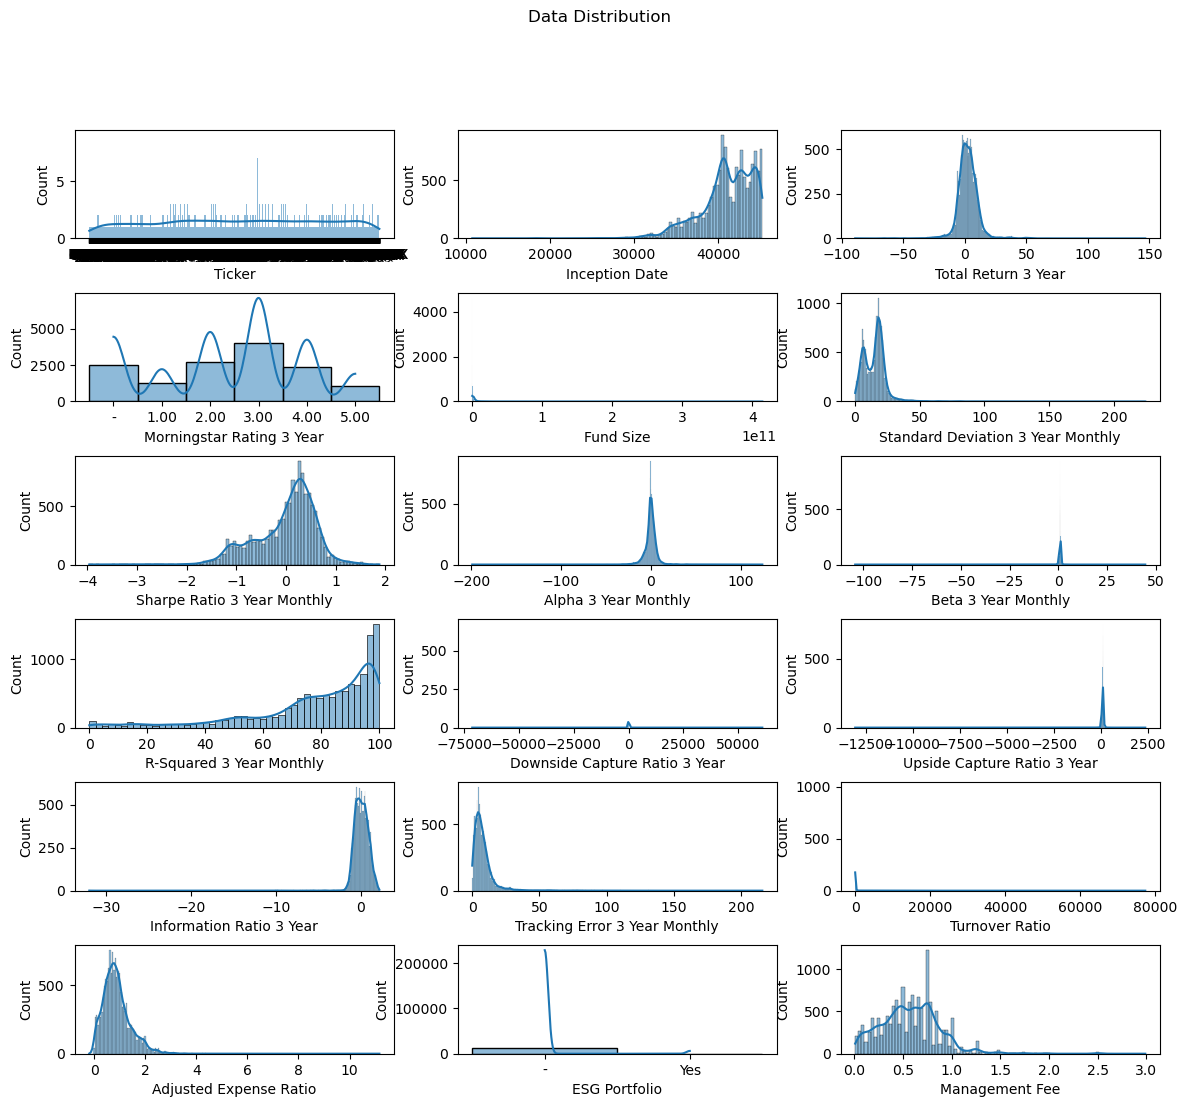

In [63]:
# Plot histograms of the features to view data distribution
fig, axes = plt.subplots(nrows=int(len(new_data.columns) / 3), ncols=3, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Data Distribution')

for ax, col in zip(axes.flatten(), new_data.columns):
    sns.histplot(new_data[col].dropna(), ax=ax, kde=True)

plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_7524\2092275586.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')


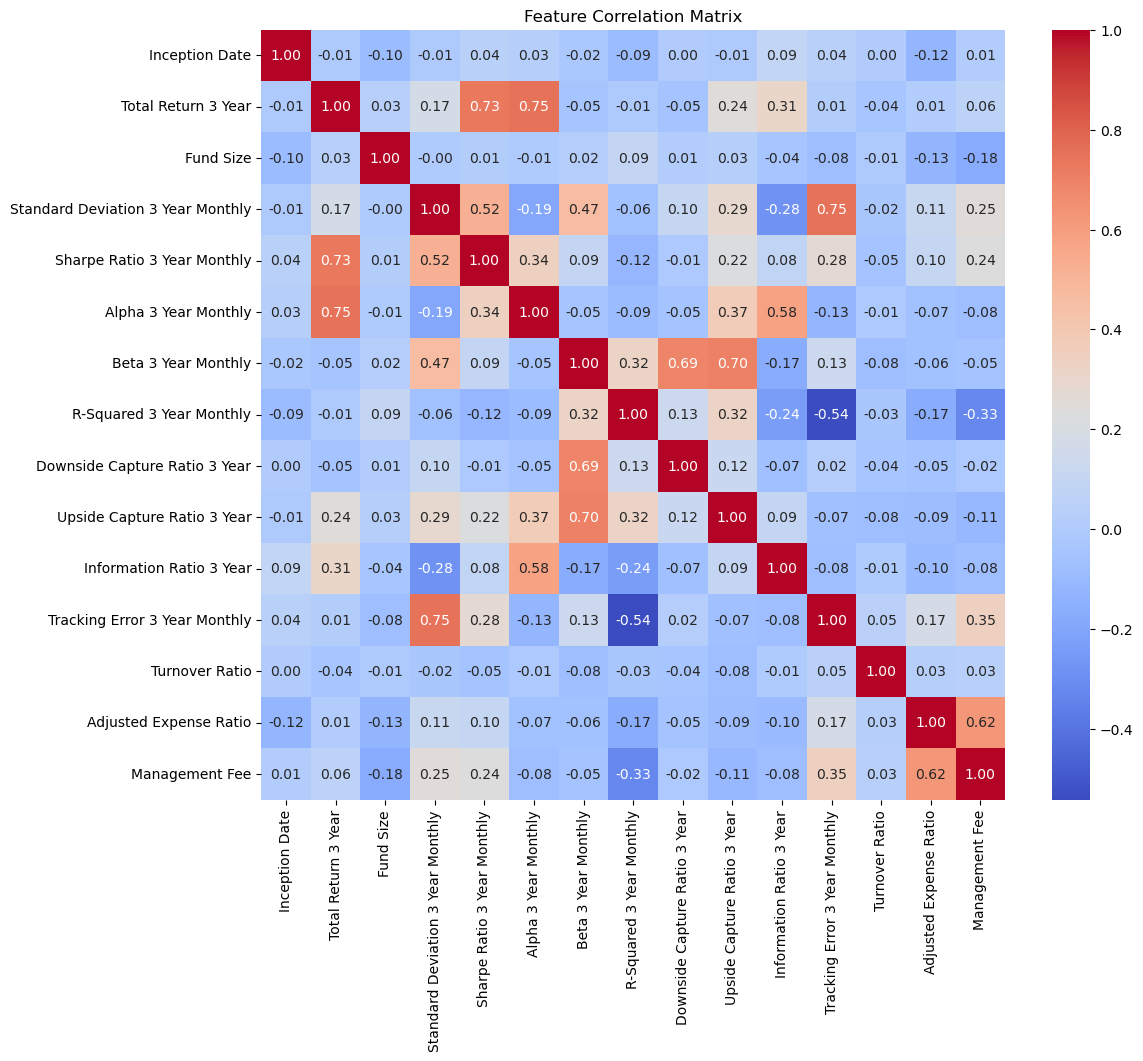

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(new_data_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


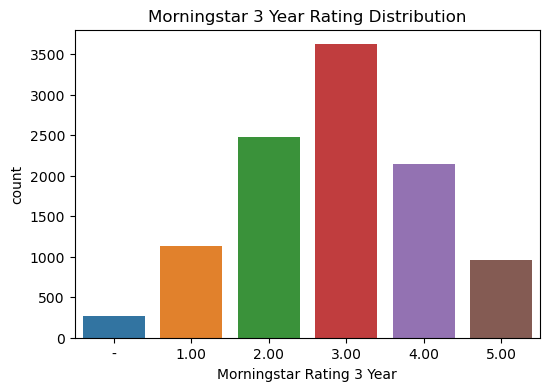

In [11]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Morningstar Rating 3 Year', data=new_data_clean)
plt.title('Morningstar 3 Year Rating Distribution')
plt.show()


In [30]:
new_data_clean.columns

Index(['Ticker', 'Inception Date', 'Total Return 3 Year',
       'Morningstar Rating 3 Year', 'Fund Size',
       'Standard Deviation 3 Year Monthly', 'Sharpe Ratio 3 Year Monthly',
       'Alpha 3 Year Monthly', 'Beta 3 Year Monthly',
       'R-Squared 3 Year Monthly', 'Downside Capture Ratio 3 Year',
       'Upside Capture Ratio 3 Year', 'Information Ratio 3 Year',
       'Tracking Error 3 Year Monthly', 'Turnover Ratio',
       'Adjusted Expense Ratio', 'ESG Portfolio', 'Management Fee'],
      dtype='object')

# 2.2 Feature engineering

In [14]:
# Code explanation: Feature engineering includes the following two steps:
# Convert 'ESG Portfolio' into a binary variable
# Scaling and normalization: Use StandardScaler to standardize numerical features. Typically, all numerical features are chosen for standardization or normalization.
# Handle categorical variables for y

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Create a new DataFrame to store data after feature engineering
features_engineered_data = new_data_clean.copy()

# View all unique values in the 'ESG Portfolio' column
unique_esg_values = features_engineered_data['ESG Portfolio'].unique()
print("Unique values in 'ESG Portfolio':", unique_esg_values)

# It appears the ESG Portfolio variable contains only two values: '-' and 'Yes'.
# This indicates it is a binary categorical variable, where '-' may represent the absence of an ESG portfolio and 'Yes' indicates the presence of an ESG portfolio.
# For such types of variables, one-hot encoding could be used, but considering it only has two values, a simpler and more effective method is to convert this variable into a binary format (0 and 1).


Unique values in 'ESG Portfolio': ['-' 'Yes']


In [13]:
# Convert 'ESG Portfolio' to a binary variable
features_engineered_data['ESG Portfolio Binary'] = features_engineered_data['ESG Portfolio'].map({'Yes': 1, '-': 0})

# Display the transformed column to confirm changes
print(features_engineered_data[['ESG Portfolio', 'ESG Portfolio Binary']].head())


  ESG Portfolio  ESG Portfolio Binary
0             -                     0
2           Yes                     1
3             -                     0
4             -                     0
5             -                     0


In [ ]:
# Standardize numerical features using StandardScaler
scaler = StandardScaler()
numeric_features = features_engineered_data.select_dtypes(include=['int64', 'float64'])
features_engineered_data[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Check and output the processed data
print(features_engineered_data.head())


In [16]:
# Handle categorical variables for y
# View all unique values in the 'Morningstar Rating 3 Year' column
unique_ratings = features_engineered_data['Morningstar Rating 3 Year'].unique()
print("Unique values in 'Morningstar Rating 3 Year':", unique_ratings)

# The 'Morningstar Rating 3 Year' column contains a category '-' representing missing or invalid data, and five valid numeric categories from '1.00' to '5.00'.
# We will remove rows containing '-', and convert the remaining data into a format suitable for classification models.

# Remove rows containing '-'
features_engineered_data = features_engineered_data[features_engineered_data['Morningstar Rating 3 Year'] != '-']

# Reset categories
features_engineered_data['Morningstar Rating 3 Year'] = features_engineered_data['Morningstar Rating 3 Year'].cat.remove_unused_categories()

# Print unique values again to check
unique_ratings = features_engineered_data['Morningstar Rating 3 Year'].unique()
print("Unique values in 'Morningstar Rating 3 Year' after removal:", unique_ratings)

Unique values in 'Morningstar Rating 3 Year': ['4.00', '3.00', '2.00', '-', '1.00', '5.00']
Categories (6, object): ['-', '1.00', '2.00', '3.00', '4.00', '5.00']
Unique values in 'Morningstar Rating 3 Year' after removal: ['4.00', '3.00', '2.00', '1.00', '5.00']
Categories (5, object): ['1.00', '2.00', '3.00', '4.00', '5.00']


In [20]:
# Convert 'Morningstar Rating 3 Year' column to integer type
# Note that since the target variable is ordinal, maintaining integer encoding is appropriate, instead of using one-hot encoding.
features_engineered_data['Morningstar Rating 3 Year'] = features_engineered_data['Morningstar Rating 3 Year'].astype(float).astype(int)

# Display the updated category situation and the head of the data
print("Updated 'Morningstar Rating 3 Year' unique values:", features_engineered_data['Morningstar Rating 3 Year'].unique())
print(features_engineered_data.columns)

Updated 'Morningstar Rating 3 Year' unique values: [4 3 2 1 5]
Index(['Ticker', 'Inception Date', 'Total Return 3 Year',
       'Morningstar Rating 3 Year', 'Fund Size',
       'Standard Deviation 3 Year Monthly', 'Sharpe Ratio 3 Year Monthly',
       'Alpha 3 Year Monthly', 'Beta 3 Year Monthly',
       'R-Squared 3 Year Monthly', 'Downside Capture Ratio 3 Year',
       'Upside Capture Ratio 3 Year', 'Information Ratio 3 Year',
       'Tracking Error 3 Year Monthly', 'Turnover Ratio',
       'Adjusted Expense Ratio', 'ESG Portfolio', 'Management Fee',
       'ESG Portfolio Binary'],
      dtype='object')


In [21]:
# Remove 'Ticker' and 'ESG Portfolio' columns from features_engineered_data
features_engineered_data = features_engineered_data.drop(['Ticker', 'ESG Portfolio'], axis=1)

# Display the head of the cleaned DataFrame to confirm changes
print(features_engineered_data.head())


   Inception Date  Total Return 3 Year  Morningstar Rating 3 Year  Fund Size  \
0       -1.036975             0.567831                          4   4.352061   
2        1.088341             0.932603                          4  -0.150579   
3        0.914587            -0.305018                          4  -0.161841   
4       -1.030471             5.868760                          3  -0.141396   
5       -0.182760             0.659024                          4  -0.218490   

   Standard Deviation 3 Year Monthly  Sharpe Ratio 3 Year Monthly  \
0                           0.689522                     0.633268   
2                           0.382765                     0.900042   
3                          -0.789917                    -0.200401   
4                           2.092875                     2.217239   
5                           0.371895                     0.749981   

   Alpha 3 Year Monthly  Beta 3 Year Monthly  R-Squared 3 Year Monthly  \
0             -0.391211       

# 2.3. PCA

Explained variance ratio by each component:
[0.1876495  0.16330674 0.1511821  0.08994962 0.08231561 0.07500164
 0.07125808 0.05920457 0.04448893 0.02630425]
Cumulative explained variance:
[0.1876495  0.35095624 0.50213835 0.59208797 0.67440358 0.74940522
 0.8206633  0.87986788 0.92435681 0.95066106]


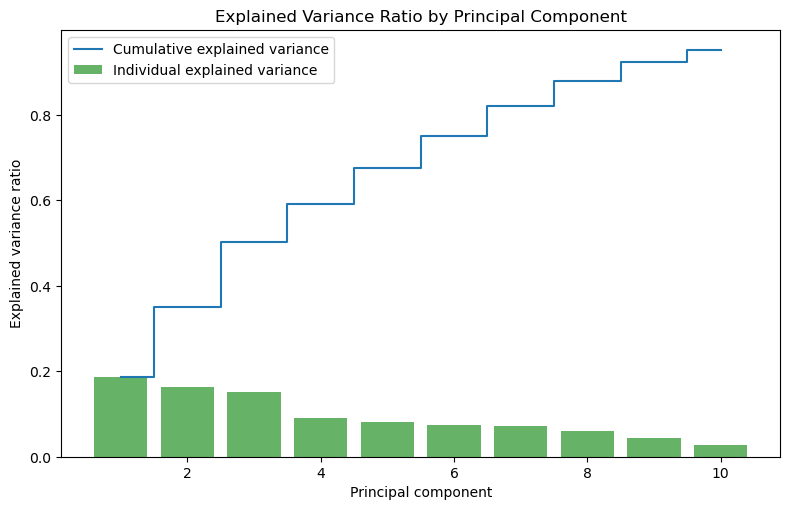

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Determine the number of PCA components
pca = PCA(n_components=0.95)  # Choose principal components that account for at least 95% of the variance
numeric_features = features_engineered_data.select_dtypes(include=['float64', 'int64'])

# Apply PCA to numerical data
pca_result = pca.fit_transform(numeric_features)

# View the variance ratio explained by each component
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

# View the cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance:")
print(cumulative_variance)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [ ]:
print("Principal components (direction vectors):")
print(pca.components_)

# 2.4. Split Training and Test Sets

In [23]:
# Split into three sets (training, testing, validation) because we will face some model selection and hyperparameter tuning issues.
# First, split out a test set, then divide the remaining data into training and validation sets. This method ensures that the test set data is not used during model selection and parameter tuning.

# Use train_test_split to separate 20% of the total data as the test set.
# Then, take 25% of the remaining 80% of the data to serve as the validation set, so that ultimately the validation set is about 20% of the original data, and the training set is about 60%.

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = features_engineered_data.drop('Morningstar Rating 3 Year', axis=1)  # Features
y = features_engineered_data['Morningstar Rating 3 Year']  # Target variable

# First split the full dataset to create a test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 here because 0.25*0.8=0.2, thereby keeping the validation set about 20% of the original data


In [25]:
# Additionally, save another dataset version with PCA principal components as X
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert PCA results to DataFrame
X_pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Reset the index of the target variable y to ensure alignment with PCA results
y_reset = y.reset_index(drop=True)

# Add the target variable to the PCA results DataFrame
X_pca_df['Morningstar Rating 3 Year'] = y_reset

# Split the data into training, validation, and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_df.drop('Morningstar Rating 3 Year', axis=1), X_pca_df['Morningstar Rating 3 Year'], test_size=0.2, random_state=42)


In [32]:
# Dataset with 16 features
print("Original Features Dataset Shapes:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

# Dataset with 11 PCA principal components
print("\nPCA Features Dataset Shapes:")
print("X_train_pca shape:", X_train_pca.shape)
#print("X_val_pca shape:", X_val_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_train_pca shape:", y_train_pca.shape)
#print("y_val_pca shape:", y_val_pca.shape)
print("y_test_pca shape:", y_test_pca.shape)


Original Features Dataset Shapes:
X_train shape: (6204, 16)
X_val shape: (2069, 16)
X_test shape: (2069, 16)
y_train shape: (6204,)
y_val shape: (2069,)
y_test shape: (2069,)

PCA Features Dataset Shapes:
X_train_pca shape: (8273, 10)
X_test_pca shape: (2069, 10)
y_train_pca shape: (8273,)
y_test_pca shape: (2069,)


In [31]:
# Check data types
print(X_train.dtypes)

Inception Date                       float64
Total Return 3 Year                  float64
Fund Size                            float64
Standard Deviation 3 Year Monthly    float64
Sharpe Ratio 3 Year Monthly          float64
Alpha 3 Year Monthly                 float64
Beta 3 Year Monthly                  float64
R-Squared 3 Year Monthly             float64
Downside Capture Ratio 3 Year        float64
Upside Capture Ratio 3 Year          float64
Information Ratio 3 Year             float64
Tracking Error 3 Year Monthly        float64
Turnover Ratio                       float64
Adjusted Expense Ratio               float64
Management Fee                       float64
ESG Portfolio Binary                 float64
dtype: object


# 3. Model Training

#### First, simply Using Machine Learning Models (SVM, Bagging Ensemble of Random Trees).

### 3.1. SVM Model

In [33]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_model.predict(X_val)

# Display the performance of the basic SVM model
print("Validation Performance of the Basic SVM Model:")
print(classification_report(y_val, y_val_pred))


Validation Performance of the Basic SVM Model:
              precision    recall  f1-score   support

           1       0.73      0.24      0.36       228
           2       0.56      0.37      0.45       504
           3       0.47      0.79      0.59       752
           4       0.43      0.32      0.37       404
           5       0.59      0.29      0.39       181

    accuracy                           0.49      2069
   macro avg       0.56      0.40      0.43      2069
weighted avg       0.52      0.49      0.47      2069



In [34]:
# SVM Tuning
# Common SVM parameter adjustments include:
# C (regularization parameter): A smaller C enhances the model's regularization strength, making the boundary smoother, while a larger C means a sharper boundary, potentially leading to overfitting.
# kernel (kernel function): Common kernel functions are linear, rbf, poly, and sigmoid. The choice of kernel function depends on the distribution of the data; different kernels may suit different data characteristics.
# gamma (kernel coefficient): Needed only when using rbf, poly, and sigmoid kernels. Gamma controls the influence range of a single training example, with higher values meaning a smaller range.
# degree (degree of polynomial kernel): When using the polynomial (poly) kernel, the highest power of the polynomial can be adjusted.

# Using GridSearchCV for parameter tuning
# To find the best parameter combination, we can use GridSearchCV, which automatically performs cross-validation and tests specified parameter combinations.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model and parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel functions
    'gamma': ['scale', 'auto'],  # Kernel coefficient, for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4, 5]  # Degree of polynomial kernel, only when kernel is 'poly'
}

# Initialize the grid search object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)

# Perform grid search
grid.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found:", grid.best_params_)
best_model = grid.best_estimator_

# Predict validation set using the best model
y_val_pred = best_model.predict(X_val)
print("Validation Performance of the Best SVM Model:")
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   1.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   1.9s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   1.9s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   1.8s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   1.1s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   1.1s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   1.1s
[CV] END .......C=0.1, degree=3, gamma=scale, kernel=sigmoid; total time=   1.6s
[CV] END .......C=0.1, degree=3, gamma=scale, kernel=sigmoid; total time=   1.7s
[CV] END .......C=0.1, degree=3, gamma=scale, k

In [64]:
# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)
print("Test Performance of the Best SVM Model:")
print(classification_report(y_test, y_test_pred))

Test Performance of the Best SVM Model:
              precision    recall  f1-score   support

           1       0.63      0.50      0.56       235
           2       0.55      0.59      0.57       483
           3       0.61      0.66      0.63       717
           4       0.54      0.56      0.55       431
           5       0.71      0.52      0.60       203

    accuracy                           0.59      2069
   macro avg       0.61      0.56      0.58      2069
weighted avg       0.59      0.59      0.59      2069



The best parameters for the SVM model are  
Best parameters found: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}  
The performance of this model was demonstrated in the previous code block

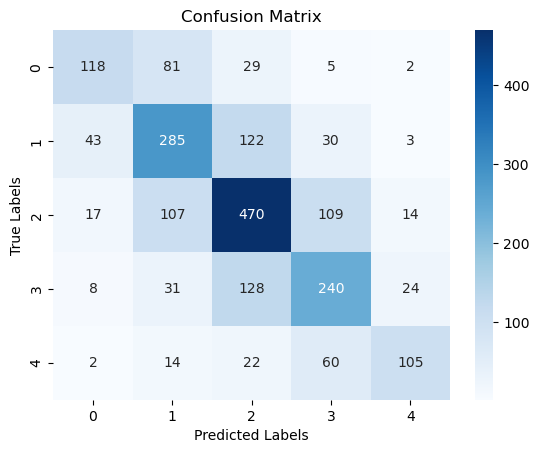

In [52]:
# Next, visualize the model performance

y_test_pred_best = best_model.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_SVM_best = confusion_matrix(y_test, y_test_pred_best)
sns.heatmap(cm_SVM_best, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 3.2. Bagging

In [66]:
# Create a bagging ensemble model based on random trees using BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree as the base model
tree = DecisionTreeClassifier(random_state=42)

# Initialize BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_bagging = bagging_model.predict(X_val)

# Output the model's performance on the validation set
print("Validation Performance of the Bagging Model with Random Trees:")
print(classification_report(y_val, y_val_pred_bagging))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Performance of the Bagging Model with Random Trees:
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       228
           2       0.80      0.84      0.82       504
           3       0.84      0.86      0.85       752
           4       0.80      0.81      0.81       404
           5       0.83      0.77      0.80       181

    accuracy                           0.82      2069
   macro avg       0.83      0.80      0.81      2069
weighted avg       0.82      0.82      0.82      2069



In [ ]:
# Parameter tuning
# Several key parameters of BaggingClassifier can be adjusted:
# n_estimators (number of base models)
# max_samples and max_features (control the amount of data and features used to build each base model)

param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],  # Train each base model using 50%, 80%, 100% of the data
    'max_features': [0.5, 0.8, 1.0]  # Train each base model using 50%, 80%, 100% of the features
}

# Use GridSearchCV to find the best parameters
grid_bagging = GridSearchCV(BaggingClassifier(base_estimator=tree, random_state=42), param_grid_bagging, cv=3, verbose=3, n_jobs=-1)
grid_bagging.fit(X_train, y_train)

# Output the best parameters and model
print("Best parameters found for Bagging:", grid_bagging.best_params_)
best_bagging_model = grid_bagging.best_estimator_

In [51]:
# Predict the validation set using the best model
y_test_pred_bagging_best = best_bagging_model.predict(X_test)

# Display the performance of the best bagging model
print("Test Performance of the Best Bagging Model:")
print(classification_report(y_test, y_test_pred_bagging_best))

Test Performance of the Best Bagging Model:
              precision    recall  f1-score   support

           1       0.86      0.74      0.80       235
           2       0.81      0.82      0.81       483
           3       0.81      0.88      0.85       717
           4       0.81      0.79      0.80       431
           5       0.86      0.76      0.81       203

    accuracy                           0.82      2069
   macro avg       0.83      0.80      0.81      2069
weighted avg       0.82      0.82      0.82      2069



Best parameters found for Bagging: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}

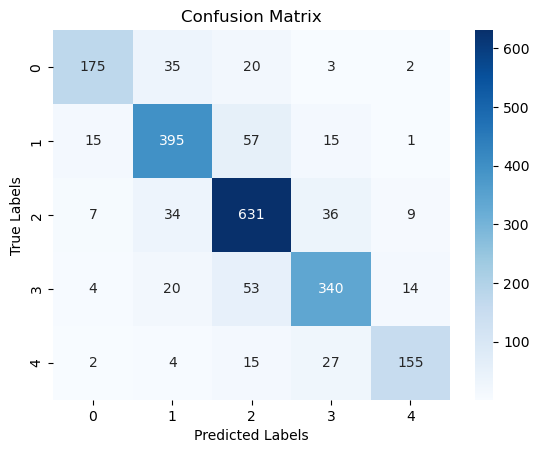

In [53]:
# Next, visualize the model performance

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_bag_best = confusion_matrix(y_test, y_test_pred_bagging_best)
sns.heatmap(cm_bag_best, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3.3 Using Innovative PCA-ML Models (PCA + SVM / Bagging)

#### 3.3.1. PCA-SVM

In [67]:
# No further parameter tuning in this section
# Because using already validated best parameters directly on the dataset obtained through PCA transformation is an efficient strategy

# PCA - SVM
from sklearn.svm import SVC

# Initialize the SVM model with the best parameters found previously
svm_pca = SVC(C=100, degree=3, gamma='scale', kernel='rbf', random_state=42)

# Train the model
svm_pca.fit(X_train_pca, y_train_pca)

# Predict on the validation set
y_test_pred_svm_pca = svm_pca.predict(X_test_pca)

# Output the model's performance on the validation set
print("Test Performance of the SVM Model with PCA Features:")
print(classification_report(y_test_pca, y_test_pred_svm_pca))

Test Performance of the SVM Model with PCA Features:
              precision    recall  f1-score   support

           1       0.69      0.52      0.60       235
           2       0.57      0.60      0.59       483
           3       0.56      0.65      0.60       717
           4       0.50      0.47      0.48       431
           5       0.70      0.49      0.58       203

    accuracy                           0.57      2069
   macro avg       0.61      0.55      0.57      2069
weighted avg       0.58      0.57      0.57      2069



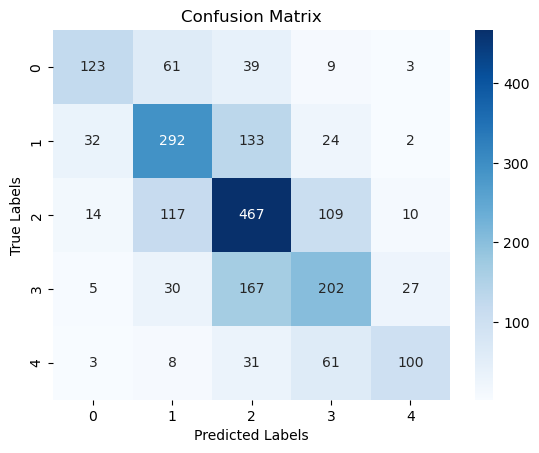

In [46]:
# Next, visualize the model performance

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_pca_svm = confusion_matrix(y_test_pca, y_test_pred_svm_pca)  # Ensure using the correct y_val_pca instead of y_val
sns.heatmap(cm_pca_svm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 3.3.2. PCA-Bagging

In [68]:
# PCA - Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree as the base model
tree_pca = DecisionTreeClassifier(random_state=42)

# Initialize the bagging model with the best parameters
bagging_pca = BaggingClassifier(base_estimator=tree_pca, n_estimators=200, max_features=0.5, max_samples=1.0, random_state=42)

# Train the model
bagging_pca.fit(X_train_pca, y_train_pca)

# Predict on the validation set
y_test_pred_bagging_pca = bagging_pca.predict(X_test_pca)

# Output the model's performance on the validation set
print("Test Performance of the Bagging Model with PCA Features:")
print(classification_report(y_test_pca, y_test_pred_bagging_pca))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Performance of the Bagging Model with PCA Features:
              precision    recall  f1-score   support

           1       0.89      0.64      0.74       235
           2       0.76      0.73      0.74       483
           3       0.68      0.87      0.76       717
           4       0.76      0.65      0.70       431
           5       0.90      0.63      0.74       203

    accuracy                           0.74      2069
   macro avg       0.80      0.71      0.74      2069
weighted avg       0.76      0.74      0.74      2069



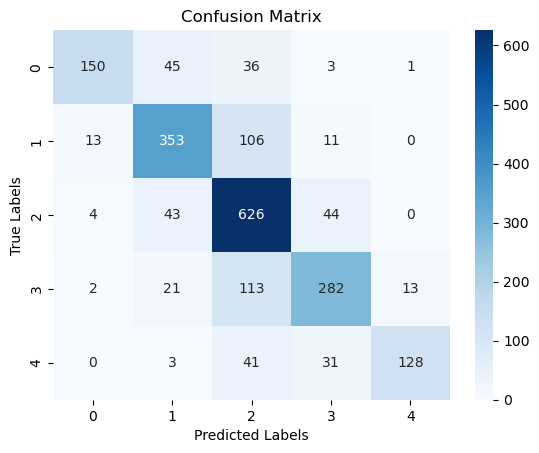

In [57]:
# Visualizing the model performance next

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_pca_bag = confusion_matrix(y_test, y_test_pred_bagging_pca)
sns.heatmap(cm_pca_bag, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Further model performance comparison

In [58]:
import pandas as pd
import numpy as np

# Convert confusion matrices to DataFrames
df_cm_SVM_best = pd.DataFrame(cm_SVM_best, index=[i for i in "12345"], columns=[i for i in "12345"])
df_cm_bag_best = pd.DataFrame(cm_bag_best, index=[i for i in "12345"], columns=[i for i in "12345"])
df_cm_pca_svm = pd.DataFrame(cm_pca_svm, index=[i for i in "12345"], columns=[i for i in "12345"])
df_cm_pca_bag = pd.DataFrame(cm_pca_bag, index=[i for i in "12345"], columns=[i for i in "12345"])

# Create a dictionary for creating a comprehensive DataFrame containing all confusion matrices
data = {
    "SVM Best": df_cm_SVM_best.stack(),
    "Bagging Best": df_cm_bag_best.stack(),
    "PCA-SVM": df_cm_pca_svm.stack(),
    "PCA-Bagging": df_cm_pca_bag.stack()
}

# Comprehensive DataFrame
df_combined = pd.DataFrame(data)
print(df_combined.head())


     SVM Best  Bagging Best  PCA-SVM  PCA-Bagging
1 1       118           175      123          150
  2        81            35       61           45
  3        29            20       39           36
  4         5             3        9            3
  5         2             2        3            1


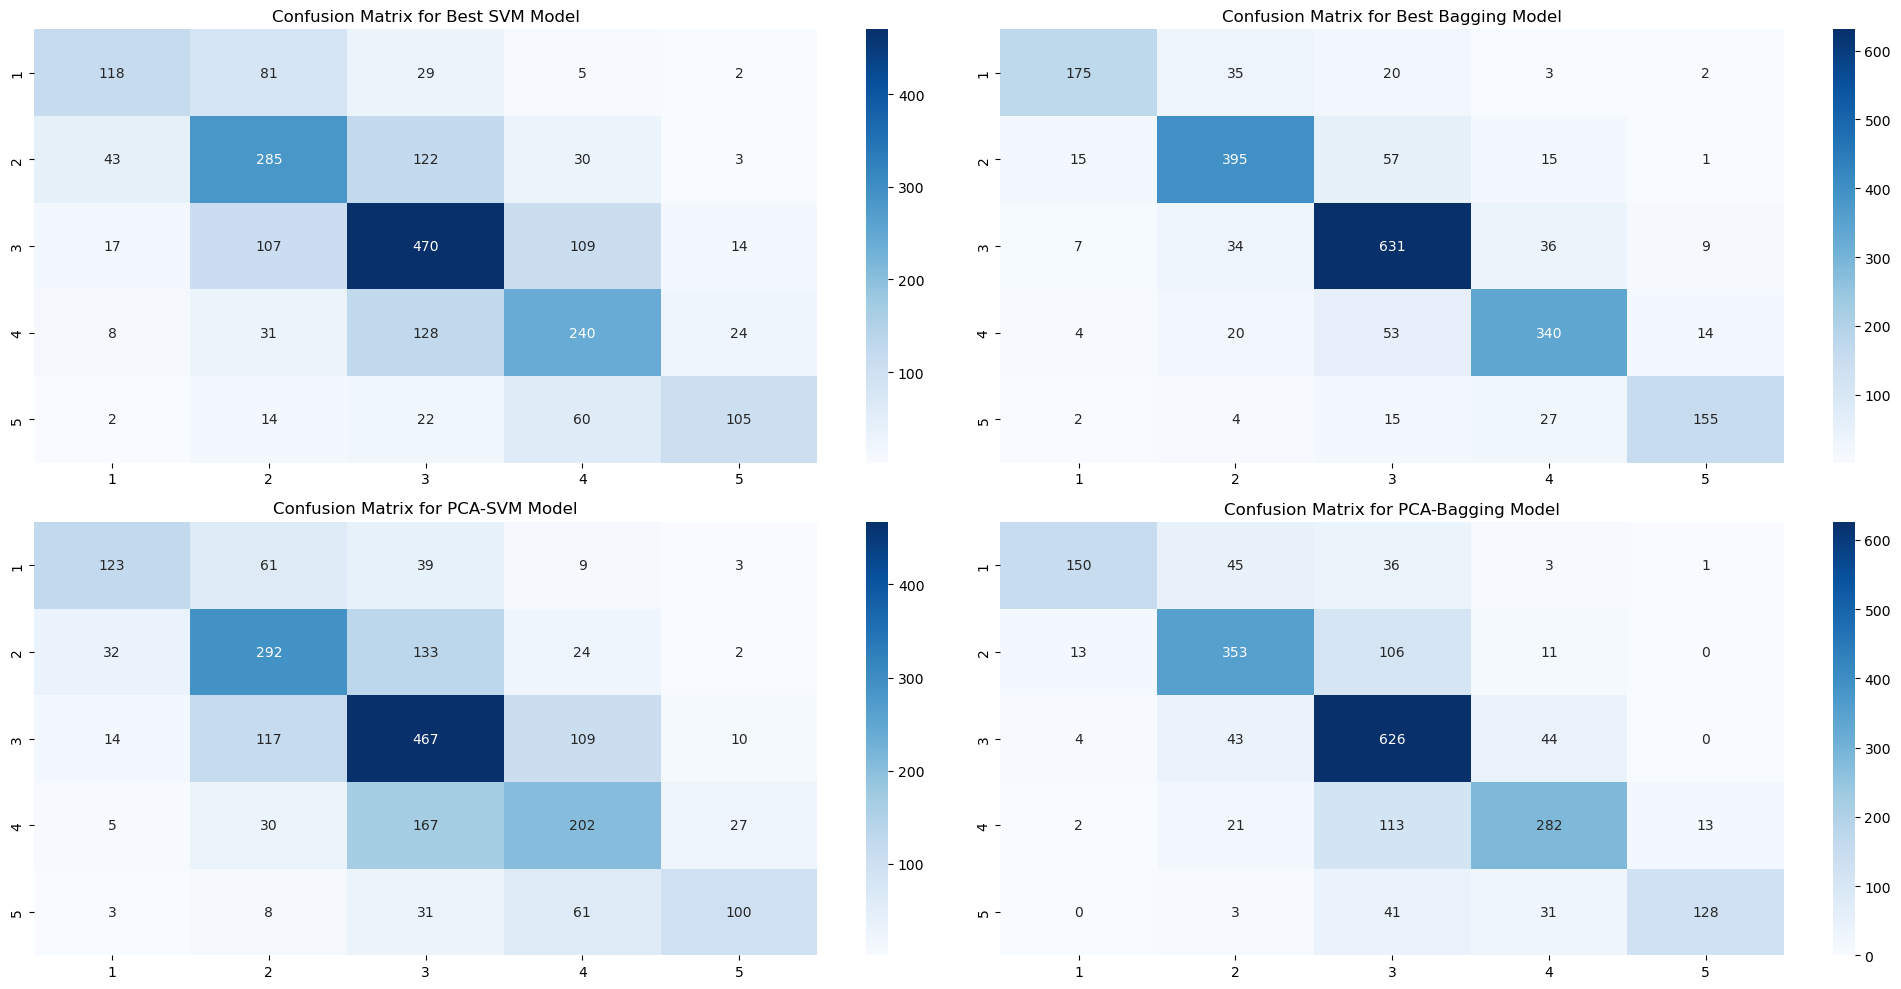

In [59]:
# Visualization comparison

plt.figure(figsize=(20, 10))

# Plotting the confusion matrix for each model
plt.subplot(2, 2, 1)
sns.heatmap(df_cm_SVM_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')

plt.subplot(2, 2, 2)
sns.heatmap(df_cm_bag_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Bagging Model')

plt.subplot(2, 2, 3)
sns.heatmap(df_cm_pca_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for PCA-SVM Model')

plt.subplot(2, 2, 4)
sns.heatmap(df_cm_pca_bag, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for PCA-Bagging Model')

# Adjusting layout
plt.tight_layout()
plt.show()


### Thank you!